In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split

# Import Numpy
import numpy as np
# For timer
import time
# Import OS
import os
# Import plotter
import matplotlib.pyplot as plt

# ==== LOCAL LIBS ====
import ecg_tools_lite as et
import evaluator as eva
import trainer as tr
import models as mod

# Summary-like from Tensorflow
from torchsummary import summary

# wfdb
import wfdb
from wfdb import processing

In [2]:
dae_res = np.load('res_pt_full_DAE_em_e00.npy')
cnn_res = np.load('res_pt_full_CNN_em_e00.npy')
ecg_clean = np.load('all_none_fs1024_e24.npy')
ecg_noisy = np.load('all_none_fs1024_e00.npy')

ecg_noisy = et.norm_sig( ecg_noisy )
ecg_clean = et.norm_sig( ecg_clean )

# dae_res = et.realign_starting(dae_res, ecg_clean.flatten())
# cnn_res = et.realign_starting(cnn_res, ecg_clean.flatten())

<Figure size 1440x576 with 0 Axes>

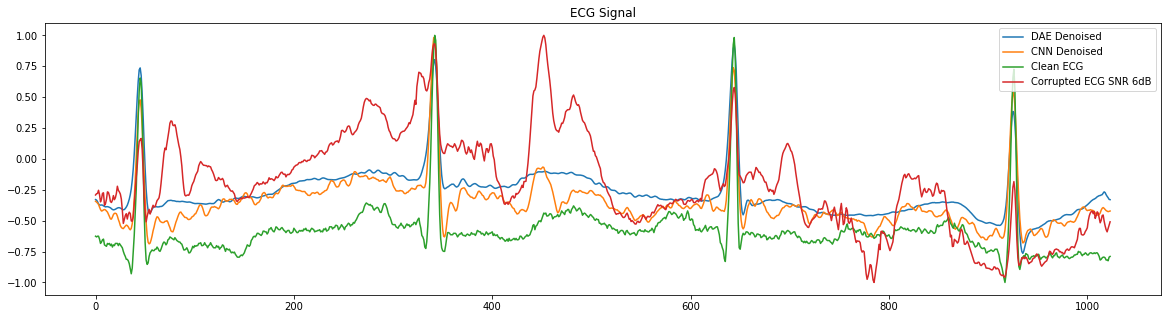

In [8]:
et.ecg_plot([dae_res.flatten(), cnn_res.flatten(), ecg_clean.flatten(), ecg_noisy.flatten()], ['DAE Denoised', 'CNN Denoised', 'Clean ECG', 'Corrupted ECG SNR 6dB'])

In [4]:
dae_res = et.realign_starting(dae_res.flatten(), ecg_clean.flatten())
cnn_res = et.realign_starting(cnn_res.flatten(), ecg_clean.flatten())

Diff: -0.2963363763363248
-0.6257309941520464 - -0.6257309941520464
-0.6257309941520464 - -0.6257309941520464
Diff: -0.2829708888578575
-0.6257309941520464 - -0.6257309941520464
-0.6257309941520464 - -0.6257309941520464


<Figure size 1440x576 with 0 Axes>

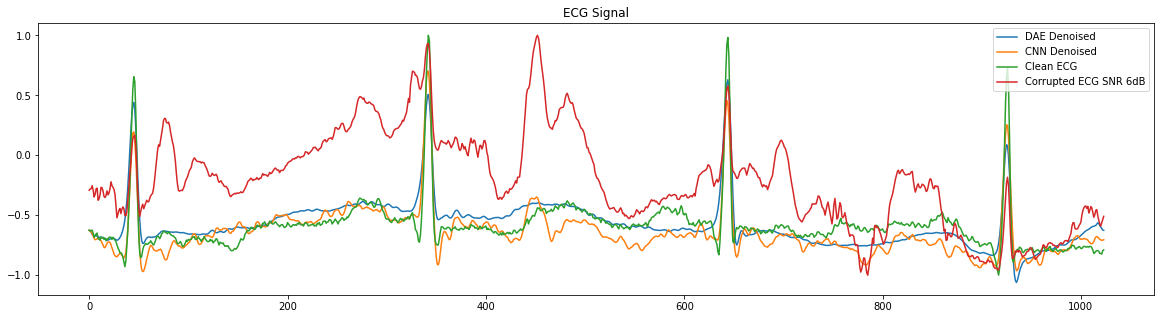

In [10]:
et.ecg_plot([dae_res, cnn_res, ecg_clean.flatten(), ecg_noisy.flatten()], ['DAE Denoised', 'CNN Denoised', 'Clean ECG', 'Corrupted ECG SNR 6dB'])

<Figure size 1440x576 with 0 Axes>

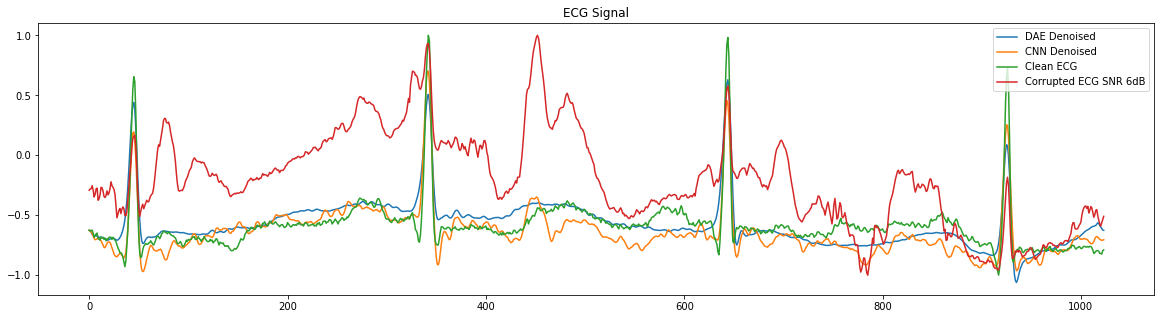

In [5]:
# For DLSU RESCON PAPER FIGURE
et.ecg_plot([dae_res, cnn_res, ecg_clean.flatten(), ecg_noisy.flatten()], ['DAE Denoised', 'CNN Denoised', 'Clean ECG', 'Corrupted ECG SNR 6dB'])

In [26]:
def ecg_plot2(ecg_sigs, labels, x_label='Sample Point', y_label='Amplitude', length=1024, index=0, title="ECG Signal", ):
    ind_start = index * length
    ind_end = ind_start + length

    

    if len(ecg_sigs) != len(labels):
        print("Signal count and label count are not equal")
        labels = np.arange(len(ecg_sigs))
    
    plt.figure( figsize=(20,8) )
    # print all inside the array
    for i, ecg_sig in enumerate(ecg_sigs):    
        plt.plot( ecg_sig[ind_start:ind_end], label=labels[i] )
    
    plt.title(label=title)
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)

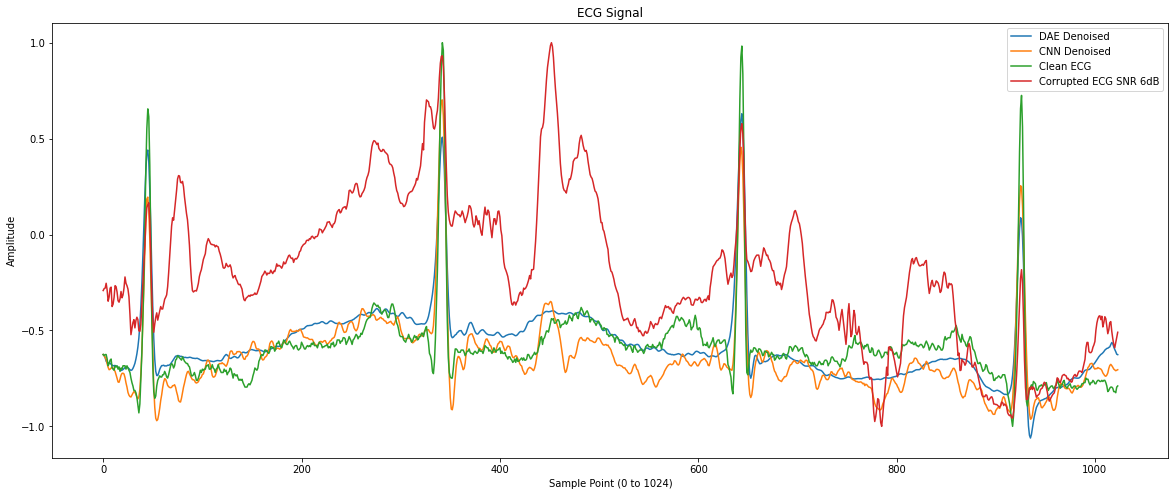

In [27]:
ecg_plot2(
    [dae_res, cnn_res, ecg_clean.flatten(), ecg_noisy.flatten()], 
    ['DAE Denoised', 'CNN Denoised', 'Clean ECG', 'Corrupted ECG SNR 6dB'],
    x_label='Sample Point (0 to 1024)')

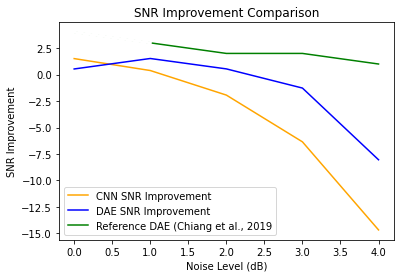

In [34]:
def basic_chart(scores, labels, title="", x_label="Noise Level (dB)", y_label="SNR Improvement", colors=['red']):
    # plt.figure( figsize=(20,8) )
    
    plt.title(label=title)    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for i, ecg_sig in enumerate(scores):  
        if len(colors) == len(labels):
            plt.plot( ecg_sig, label=labels[i], color=colors[i] )
            # Support for skip labels
            if labels[i] == '_skip':
                plt.plot( ecg_sig, color='white', linewidth=3 )
        else:
            plt.plot( ecg_sig, label=labels[i] )
    plt.legend()

score_pts = [
            [1.511,0.385,-1.935,-6.351,-14.668], 
            [0.532,1.521,0.539,-1.272,-8.043],
            [ 4, 3, 2, 2, 1],
            [ 4,3,]
            ]
label = ['CNN SNR Improvement','DAE SNR Improvement', 'Reference DAE (Chiang et al., 2019', '_skip']
colors = [
    'orange', 'blue', 'green', 'green'
]
basic_chart (score_pts, label, title="SNR Improvement Comparison", colors=colors)